<h1 align="center" style='font-size: 38px;'>
Hit Song Analysis
</h1>

<table>
    <tr>
        <td> <img src="https://images.aftonbladet-cdn.se/v2/images/1c1ada48-1a7e-430b-a69e-9e88053bde8a?fit=crop&format=auto&h=1322&q=50&w=1900&s=19ad0477d4ef399c9c6cbce5aad6faf15383435f" alt="Abba" style="width: 270px;"/> </td>
        <td> <img src="https://www.billboard.com/wp-content/uploads/media/06-U2-timeline-billboard-1548.jpg?w=1024" alt="U2" style="width: 270px;"/> </td>
        <td> <img src="https://cdn.britannica.com/02/162002-050-02512608/Tupac-Shakur-1993.jpg" alt="2Pac" style="width: 270px;"/> </td>
        <td> <img src="https://www.rollingstone.com/wp-content/uploads/2022/12/britney-spears-2000.jpg?w=831&h=554&crop=1" alt="Britney Spears" style="width: 270px;"/> </td>
        <td> <img src="https://djmagmx.com/wp-content/uploads/2018/01/calvinharris.jpg" alt="Calvin Harris" style="width: 270px;"/> </td>
    </tr>
</table>


<p style='text-align: center; font-size: 18px; font-style: italic;'> 
I'm diving into the top hits from 1970 to 2019 to see how music has evolved over time. <br>
Using data from Spotify, I'll explore how musical trends have moved with culture and technology. <br>
</p>

***

# 1. Intro


Music is more than just melodies and rhythms. It's a reflection of society, evolving with cultural shifts and technological advancements in both music production and how we consume music.<br>
My goal with this analysis is two-folded. First I want to dig deeper into any major shifts throughout the decades that I find interesting. Second I want to have a look at modern hits and see if it is possible to learn what is needed to create a hit song today.<br>

Before I dive into this, I will set up my environment and explore the data.

***

# 2. Setting up the environment

The data has been cleaned in another notebook and I might import additional libraries later on if needed.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('../data/top_hits_1970_to_2019_cleaned.csv') 

### 2.1 Data overview

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4997 non-null   object 
 1   artist            4997 non-null   object 
 2   popularity        4997 non-null   int64  
 3   explicit          4997 non-null   bool   
 4   energy            4997 non-null   float64
 5   tempo             4997 non-null   float64
 6   positiveness      4997 non-null   float64
 7   danceability      4997 non-null   float64
 8   acousticness      4997 non-null   float64
 9   loudness          4997 non-null   float64
 10  mode              4997 non-null   object 
 11  duration_minutes  4997 non-null   float64
 12  key               4997 non-null   object 
 13  album_name        4997 non-null   object 
 14  year              4997 non-null   int64  
dtypes: bool(1), float64(7), int64(2), object(5)
memory usage: 551.6+ KB


In [27]:
df.head(5)

,name,artist,popularity,explicit,energy,tempo,positiveness,danceability,acousticness,loudness,mode,duration_minutes,key,album_name,year
0,Let It Be - Remastered 2009,The Beatles,79,False,0.403,143.462,0.410,0.443,0.6310,-8.339,Major,4.1,C,Let It Be (Remastered),1970
1,Cecilia,Simon & Garfunkel,76,False,0.876,102.762,0.954,0.755,0.3570,-8.867,Major,2.9,C,Bridge Over Troubled Water,1970
2,Son of a Preacher Man,Aretha Franklin,38,False,0.473,77.583,0.561,0.474,0.5450,-11.454,Major,3.3,D,The Queen Of Soul,1970
3,Who'll Stop The Rain,Creedence Clearwater Revival,65,False,0.797,123.566,0.622,0.598,0.0424,-6.793,Major,2.5,G,Cosmo's Factory (Expanded Edition),1970
4,I Want You Back,The Jackson 5,80,False,0.538,196.605,0.886,0.469,0.3050,-13.559,Major,2.9,Gsharp/Aflat,Diana Ross Presents The Jackson 5,1970


### 2.2 Data dictionairy

- **name** - Name of the song
- **artist** - Name of the artist
- **popularity** - The popularity of a track is a value between 0 and 100, with 100 being the most popular
- **explicit** - If the song is explicit (True), or not (False)
- **energy** - Measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity
- **tempo** - Bpm of song (Beats per minute)
- **positiveness** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
- **danceability** - Describes how suitable a track is for dancing based on a combination of musical elements
- **acousticness** - A confidence measure from 0.0 to 1.0 of whether the track is acoustic
- **loudness** - The overall loudness of a track in decibels (dB)
- **mode** - Indicates the modality (major or minor) of a track
- **duration_minutes** - Duration of the track in minutes
- **key** - The key the track is in (C, Csharp, etc)
- **album_name** - Name of the album
- **year** - What year the song was released

***

# 3. Exploring the data

In [28]:
columns_to_count = ['name', 'artist', 'album_name']

# count unique song names, artist names, album names
for col in columns_to_count:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

name: 4658 unique values
artist: 1938 unique values
album_name: 3521 unique values


So this dataset contains 4658 unique song names, coming from 1938 different artists and spread across 3521 albums.
Seems like a good spread!<br>Unfortunately it was not possible to get the genres of the songs from the API. Neither have I been able to get a hold of any lyrics for the tracks.

Let's have a look at some of the attributes in the dataset. For the linecharts, I will be using moving averages with a window of five years to smoothen out the curves and give a better overview of the data.

### 3.1 Energy, positiveness, and danceability over time

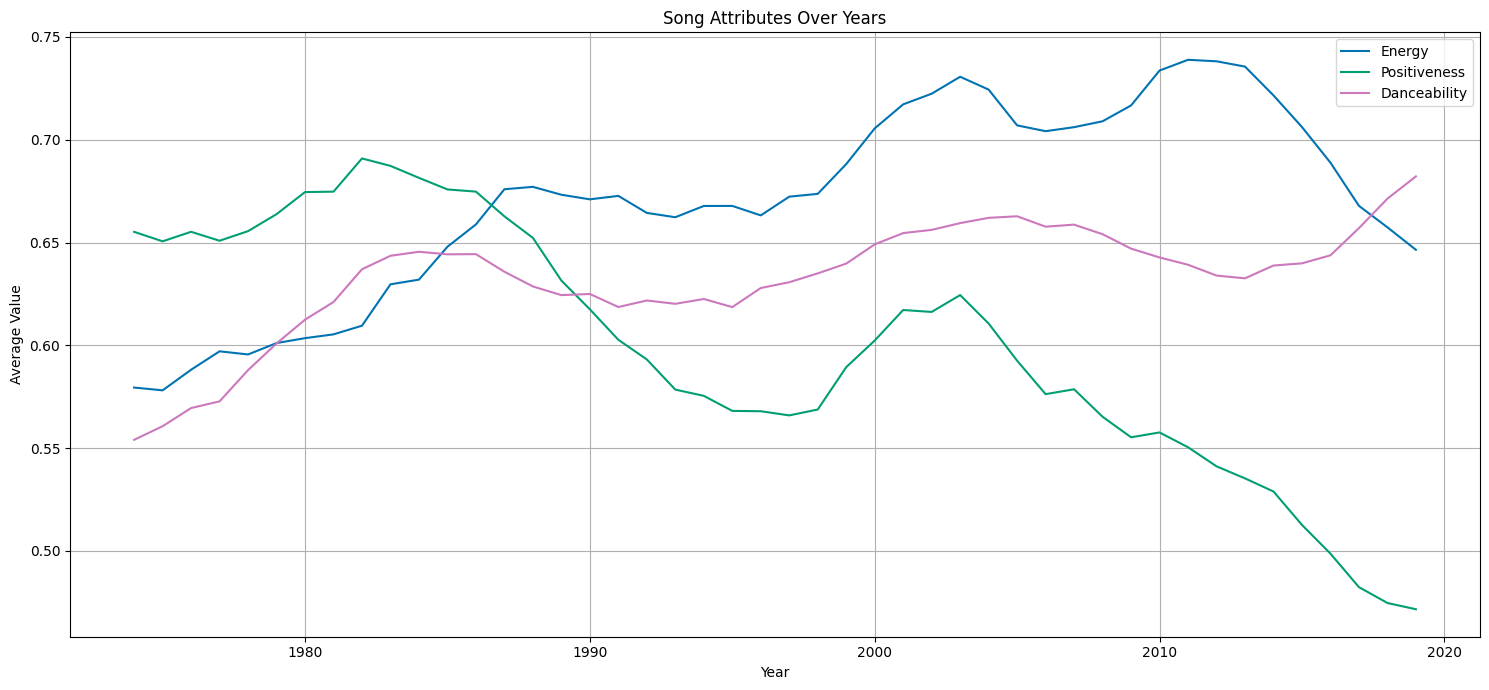

In [29]:
columns_attr_linechart = ['energy', 'positiveness', 'danceability']

# group data by year and calculate mean for each column
grouped_data_attr = df.groupby('year')[columns_attr_linechart].mean()

# 5 year rolling average (fair?)
window_size = 5  

# get moving average of columns
grouped_data_attr = grouped_data_attr.rolling(window=window_size).mean()


plt.figure(figsize=(15, 7))

# set line colors from colorblind palette
line_colors = sns.color_palette("colorblind", 8)

# plot moving averages of attributes (loop this)
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='energy', label='Energy', color=line_colors[0])
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='positiveness', label='Positiveness', color=line_colors[2])
sns.lineplot(data=grouped_data_attr, x=grouped_data_attr.index, y='danceability', label='Danceability', color=line_colors[4])

# set title and labels
plt.title('Song Attributes Over Years')
plt.ylabel('Average Value')
plt.xlabel('Year')

# display legend and grid lines
plt.legend()
plt.grid(True)

# adjust layout
plt.tight_layout()

# show plot
plt.show()

- **Energy**: The energy of songs has steadily rised since the 70s and peaking somewhere just after 2010. There is a small decline post 2010 but nothing too crazy. <br>
- **Positiveness**: Over the years, it looks like songs are getting more negative except for a small peak around 2000. <br>
- **Danceability**: There seem to have been a slow rise in danceability over time, with a small upwards trend starting around mid 2015. Interestingly enough, the energy and positiveness of songs are going down at the same period.

### 3.2 Acousticness and Loudness

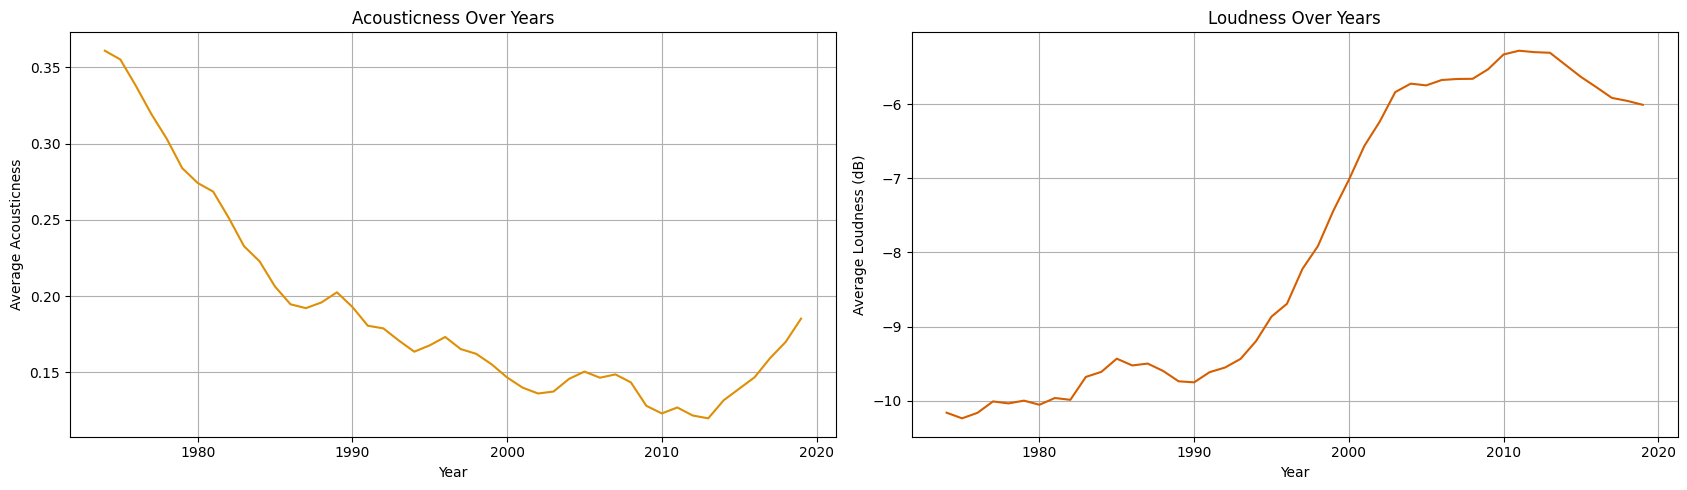

In [30]:
window_size = 5  
# MAKE FUNCTION FOR THE MOVING AVERAGE CALCS (DRY)

# group data by year and get mean for acousticness
grouped_data_acous = df.groupby('year')[['acousticness']].mean()

# calc moving avg of acousticness
grouped_data_acous['acousticness_moving'] = grouped_data_acous['acousticness'].rolling(window=window_size).mean()

# group data by year and get mean for loudness
grouped_data_loud = df.groupby('year')[['loudness']].mean()

# calc moving average for loudness
grouped_data_loud['loudness_moving'] = grouped_data_loud['loudness'].rolling(window=window_size).mean()


plt.figure(figsize=(17, 5))

# acousticness plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot (think css grid)
sns.lineplot(data=grouped_data_acous, x=grouped_data_acous.index, y='acousticness_moving', color=line_colors[1])
plt.title('Acousticness Over Years')
plt.ylabel('Average Acousticness')
plt.xlabel('Year')
plt.grid(True)

# loudness plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot (think css grid)
sns.lineplot(data=grouped_data_loud, x=grouped_data_loud.index, y='loudness_moving', color=line_colors[3])
plt.title('Loudness Over Years')
plt.ylabel('Average Loudness (dB)')
plt.xlabel('Year')
plt.grid(True)


plt.tight_layout()
plt.show()

- **Acousticness**: Songs used to have more acoustic elements in the 70s. This has decreased until just after 2010. Maybe a return to more "real" instruments in hit songs?<br>
- **Loudness**: Songs have been getting louder over time, peaking around 2010. But after that it seems to be going down, could this be a reaction to the infamous loudness war?

### 3.3 Explicit, Mode, and Key

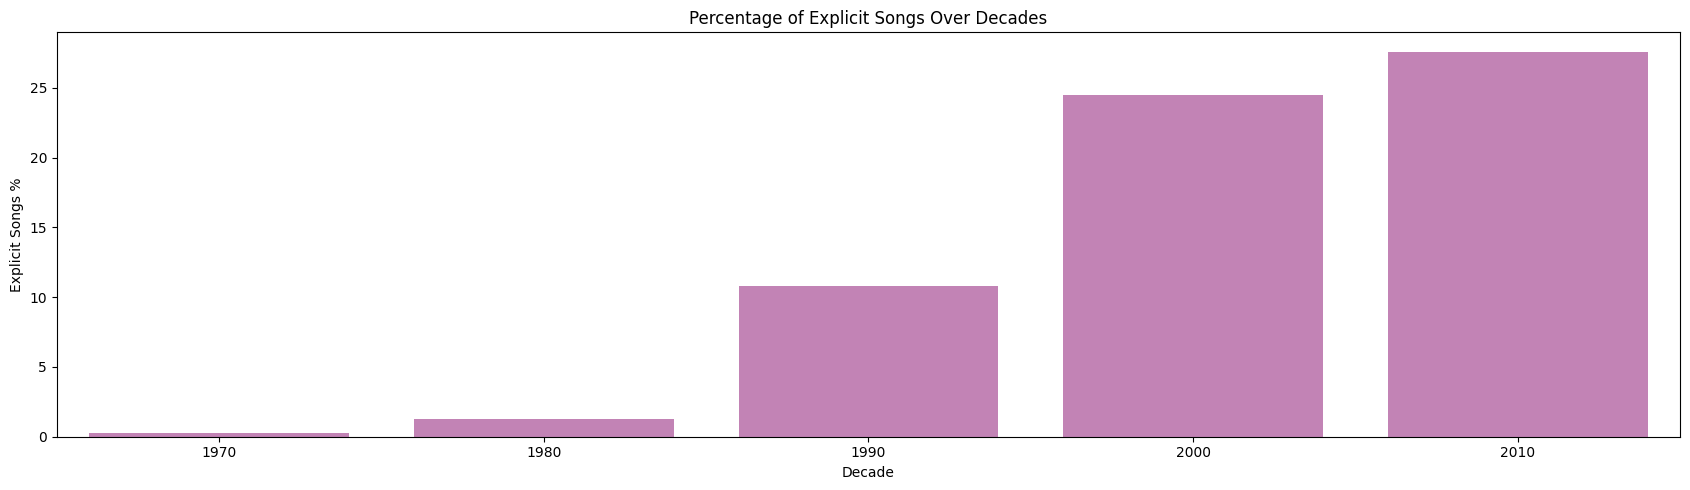

In [31]:
# set decades instead of years (cleaner)
decades = (df['year'] // 10) * 10

# filter dataframe for explicit songs, count for every decade
explicit_counts = df[df['explicit']].groupby(decades).size() # will only store True values

# set percentage
total_counts = df.groupby(decades).size()
explicit_counts_percentage = (explicit_counts / total_counts) * 100

# convert series to df
df_percentage = explicit_counts_percentage.reset_index()
df_percentage.columns = ['decade', 'explicit_percentage']

# get color from the colorblind palette
pink_color = sns.color_palette("colorblind", 8)[4]

# barplot of explicit percentage
plt.figure(figsize=(17, 5))
sns.barplot(x='decade', y='explicit_percentage', data=df_percentage, color=pink_color)

plt.title('Percentage of Explicit Songs Over Decades')
plt.ylabel('Explicit Songs %')
plt.xlabel('Decade')

plt.tight_layout()
plt.show()

- **Explicit**: The first two decades from the dataset has barely any explicit hits. But something changed in the 90s, and after that, explicit hits are far more common.

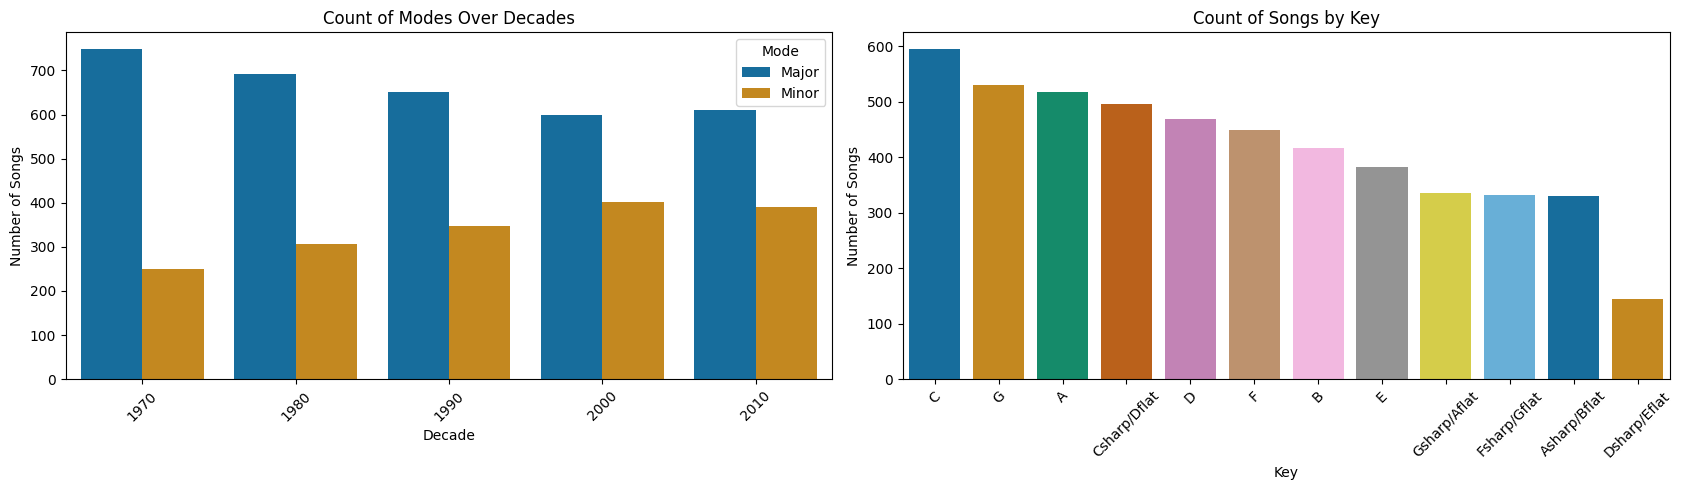

In [32]:
# group by decades and mode, count for each decade
mode_counts = df.groupby([decades, 'mode']).size().reset_index(name='counts')

# count each key in the dataset
key_counts = df['key'].value_counts()

plt.figure(figsize=(17, 5))

# barplot of modes
plt.subplot(1, 2, 1)
sns.barplot(x='year', y='counts', hue='mode', data=mode_counts, palette="colorblind")
plt.title('Count of Modes Over Decades')
plt.ylabel('Number of Songs')
plt.xlabel('Decade')
plt.xticks(rotation=45)
plt.legend(title='Mode')

# barplot of keys
plt.subplot(1, 2, 2)
sns.barplot(x=key_counts.index, y=key_counts.values, order=key_counts.index, palette="colorblind")
plt.title('Count of Songs by Key')
plt.xlabel('Key')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

- **Mode**: Major songs are becoming less common over the decades.<br>
- **Key**: C is in the top, but other keys are not that far behind. Dsharp/Eflat seems to be the underdog.

### 3.4 Tempo and Duration

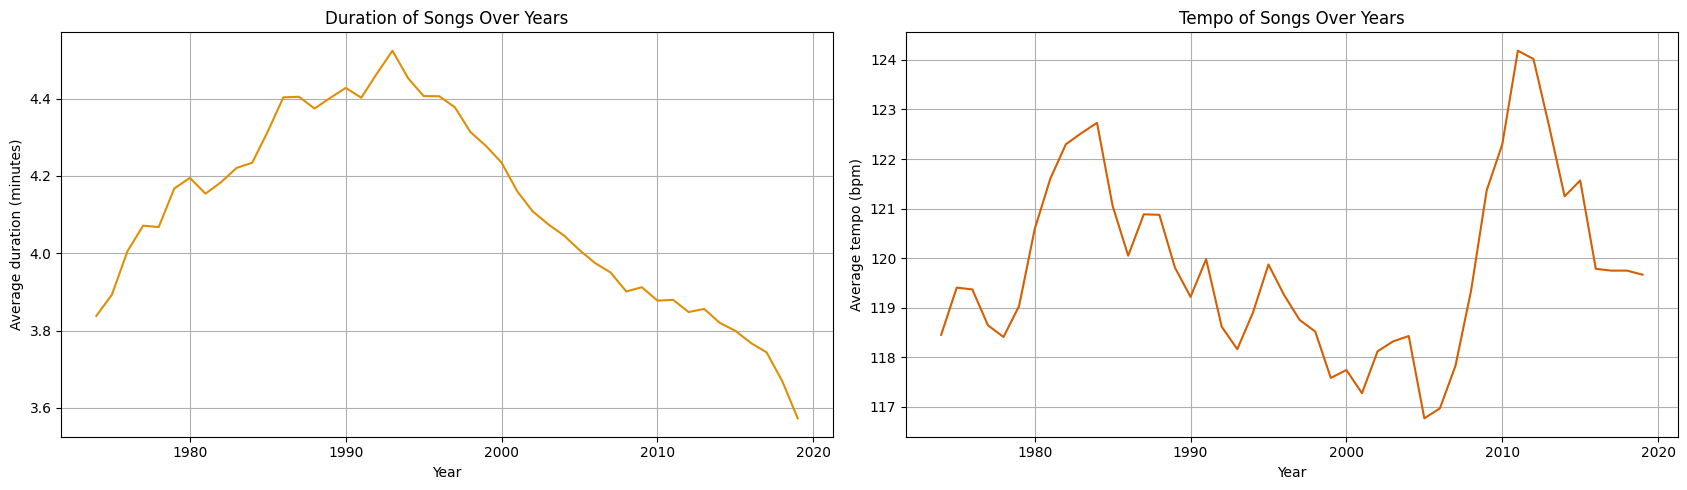

In [33]:
window_size = 5  
# MAKE FUNCTION FOR THE MOVING AVERAGE CALCS (DRY)

# group data by year and get mean for duration
grouped_data_dur = df.groupby('year')[['duration_minutes']].mean()

# calc moving avg of duration
grouped_data_dur['duration_moving'] = grouped_data_dur['duration_minutes'].rolling(window=window_size).mean()

# group data by year and get mean for tempo
grouped_data_tempo = df.groupby('year')[['tempo']].mean()

# calc moving average for loudness
grouped_data_tempo['tempo_moving'] = grouped_data_tempo['tempo'].rolling(window=window_size).mean()


plt.figure(figsize=(17, 5))

# duration plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot (think css grid)
sns.lineplot(data=grouped_data_dur, x=grouped_data_dur.index, y='duration_moving', color=line_colors[1])
plt.title('Duration of Songs Over Years')
plt.ylabel('Average duration (minutes)')
plt.xlabel('Year')
plt.grid(True)

# tempo plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot (think css grid)
sns.lineplot(data=grouped_data_tempo, x=grouped_data_tempo.index, y='tempo_moving', color=line_colors[3])
plt.title('Tempo of Songs Over Years')
plt.ylabel('Average tempo (bpm)')
plt.xlabel('Year')
plt.grid(True)


plt.tight_layout()
plt.show()

- **Duration**: Songs seem to have gotten longer until the mid 90s. What caused them to shorten after this? New technologies / Platforms?<br>
- **Tempo**: The tempo of songs seems to slowly down from the mid 80s. Even though it looks like it's varying a lot it's actually not much happening until just after 2010 where there is a peak followed by a steep curve downwards.

***

# 4. Trends in hit music

After having a look at the exploratory part of this analysis, it is clear that music, just like culture, evolves over time. <br>
Some of these trends has caught my attention more than other which is why I want to investigate them further in this chapter. <br>
As I am born in the 90s, I am more interested in looking into the later trends. Specifically, I want to look deeper into:
- **4.1 The shortening of songs:** *Why are hit songs getting shorter?*
- **4.2 The emotional tone of songs:** *Are hit songs becoming more raw?*
- **4.3 The Impact of the Loudness War:** *Looking at the loudness in hit songs.*

### 4.1 The shortening of songs

Song durations have seen a shift over the decades. While songs got longer up to the 1990s, there's been a huge drop since then. But why?<br>
Let's have a look at some examples of this by taking three of the biggest artist from the last decade and compare one of their old albums with one of their new ones.

In [34]:
albums_to_compare = pd.read_csv('../data/albums_to_compare.csv')

In [35]:
# convert duration from milliseconds to minutes and seconds
albums_to_compare['duration_minutes'] = albums_to_compare['duration_ms'] / 60000
albums_to_compare['duration_minutes'] = albums_to_compare['duration_minutes'].round(1)

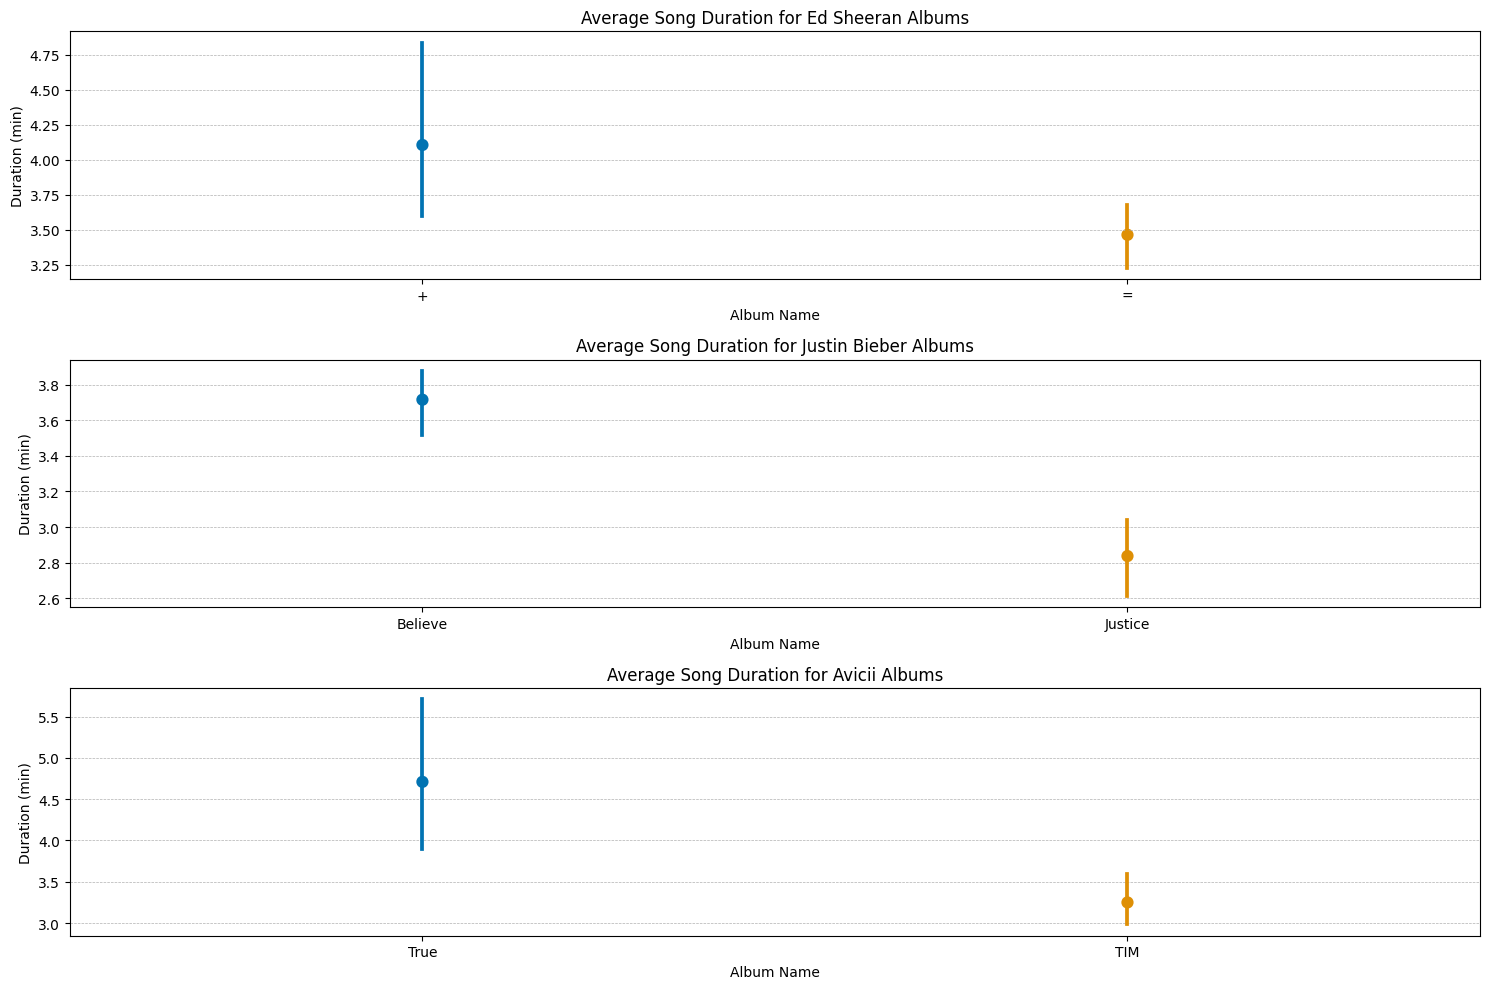

In [36]:
plt.figure(figsize=(15, 10))

# ed sheeran
plt.subplot(3, 1, 1)
sns.pointplot(x='album_name', y='duration_minutes', data=albums_to_compare[albums_to_compare['artist'] == 'Ed Sheeran'], palette='colorblind')
plt.title('Average Song Duration for Ed Sheeran Albums')
plt.ylabel('Duration (min)')
plt.xlabel('Album Name')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)

# justin bieber
plt.subplot(3, 1, 2)
sns.pointplot(x='album_name', y='duration_minutes', data=albums_to_compare[albums_to_compare['artist'] == 'Justin Bieber'], palette='colorblind')
plt.title('Average Song Duration for Justin Bieber Albums')
plt.ylabel('Duration (min)')
plt.xlabel('Album Name')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)

# avicii
plt.subplot(3, 1, 3)
sns.pointplot(x='album_name', y='duration_minutes', data=albums_to_compare[albums_to_compare['artist'] == 'Avicii'], palette='colorblind')
plt.title('Average Song Duration for Avicii Albums')
plt.ylabel('Duration (min)')
plt.xlabel('Album Name')
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


It's clear from this example that top artists are making their tracks shorter over time. Why is this happening? Before the year 2000, artists had the freedom to create longer songs because of CDs and vinyls. But today, with platforms like Spotify, shorter songs have become the trend and this is simply because they earn more.<br> On Spotify, artists earn between 0.003 to 0.005 dollars per stream and the song needs to play for at least 30 seconds before the artist gets paid. This might push artists and their record labels to create shorter songs.<br>
But it's not just about Spotify. With the move into the digital age, our attention spans seem to be getting shorter and platforms like TikTok, Instagram, and YouTube are getting filled with short, catchy tunes. These songs need to grab the attention fast, to get to the catchy hook or chorus quickly.<br><br>
Back in the day, the goal was to get people to buy and enjoy as much of an album as possible to get value for their money. Then, it shifted to getting radio plays to sell singles. Now, it seems to be all about squeezing the most money out of every play on digital platforms like Spotify.

<div style="text-align: center;">
    <img src="https://media.licdn.com/dms/image/C4E12AQFhtwT-CkfszA/article-inline_image-shrink_1000_1488/0/1520586306628?e=1699488000&v=beta&t=KDArsMhN-JGRMvN93xo2V5Hej_SkemEldoLm5ONbxLU" alt="CREAM" width="450"/>
</div>

### 4.2 The emotional tone of songs

I have observed a shift towards songs with a sadder feel. This got me thinking, especially since I came across some data indicating that young people, especially those aged 16-25, are feeling more down in modern times. Since this age group is a significant audience for hit songs, I think it's important to say something about it, even though it feels far fetched.

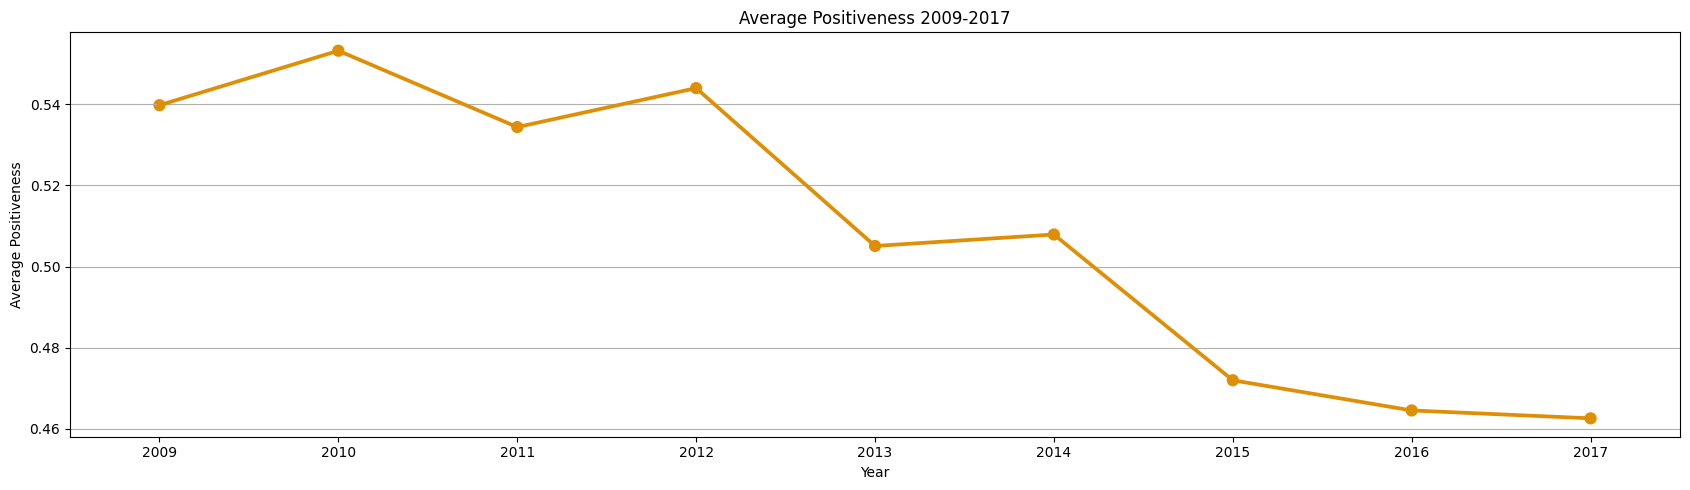

In [37]:
# Filter the dataset to include only years between 2000 and 2019
filtered_df = df[df['year'].between(2009, 2017)]

# Group by year and calculate the average positiveness for each year
positiveness_trend = filtered_df.groupby('year')[['positiveness']].mean()

plt.figure(figsize=(17, 5))

sns.pointplot(data=positiveness_trend, x=positiveness_trend.index, y='positiveness', color=line_colors[1])
plt.title('Average Positiveness 2009-2017')
plt.ylabel('Average Positiveness')
plt.xlabel('Year')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

<div style="text-align: center;">
    <img src="https://i.insider.com/5c927ddd4f07ae5d161a603f?width=1300&format=jpeg&auto=webp" alt="Depression Chart" width="650"/>
</div>

*Hilary Brueck, Shayanne Gal (Business Insider) - Based on eight years of data from more than 600,000 people across the US,* <br>
*Source: https://www.businessinsider.com/depression-rates-by-age-young-people-2019-3?r=US&IR=T*

These two graphs might indicate some what of a relationship between hit songs and the general mode of society, but it's important to be cautious. While these trends might appear to be linked, it could also just be another spurious correlation.<br>
The world of music is big and influenced by many factors. Maybe artists are exploring deeper emotions, or maybe it's just a popular trend. Whatever it might be, it's still interesting to see how music might be connected to peoples feelings.<br>

**Is pop getting more influenced by hiphop?**<br>

What I want to do is to see if there is any pattern of top pop artists going more and more explicit over the years. Since rap music is famous for being explicit and has really topped the hit charts the last decade, I will ignore these artist when looking into the trends here.<br>
Let's divide the top 15 artist for every five year since the year 2000 and compare the explicit tracks with the non explicit tracks and also exclude all the hiphop artist.<br>

In [38]:
# filter for years 2000 to 2019
year_filter_2015_2019 = df[df['year'].between(2015, 2019)]
year_filter_2010_2014 = df[df['year'].between(2010, 2014)]
year_filter_2005_2009 = df[df['year'].between(2005, 2009)]
year_filter_2000_2004 = df[df['year'].between(2000, 2004)]

# count occurrences for each artist
top_artist_counts_2015_2019 = year_filter_2015_2019['artist'].value_counts()
top_artist_counts_2010_2014 = year_filter_2010_2014['artist'].value_counts()
top_artist_counts_2005_2009 = year_filter_2005_2009['artist'].value_counts()
top_artist_counts_2000_2004 = year_filter_2000_2004['artist'].value_counts()

# get top 15 artists
top_15_artists_2015_2019 = top_artist_counts_2015_2019.head(15)
top_15_artists_2010_2014 = top_artist_counts_2010_2014.head(15)
top_15_artists_2005_2009 = top_artist_counts_2005_2009.head(15)
top_15_artists_2000_2004 = top_artist_counts_2000_2004.head(15)

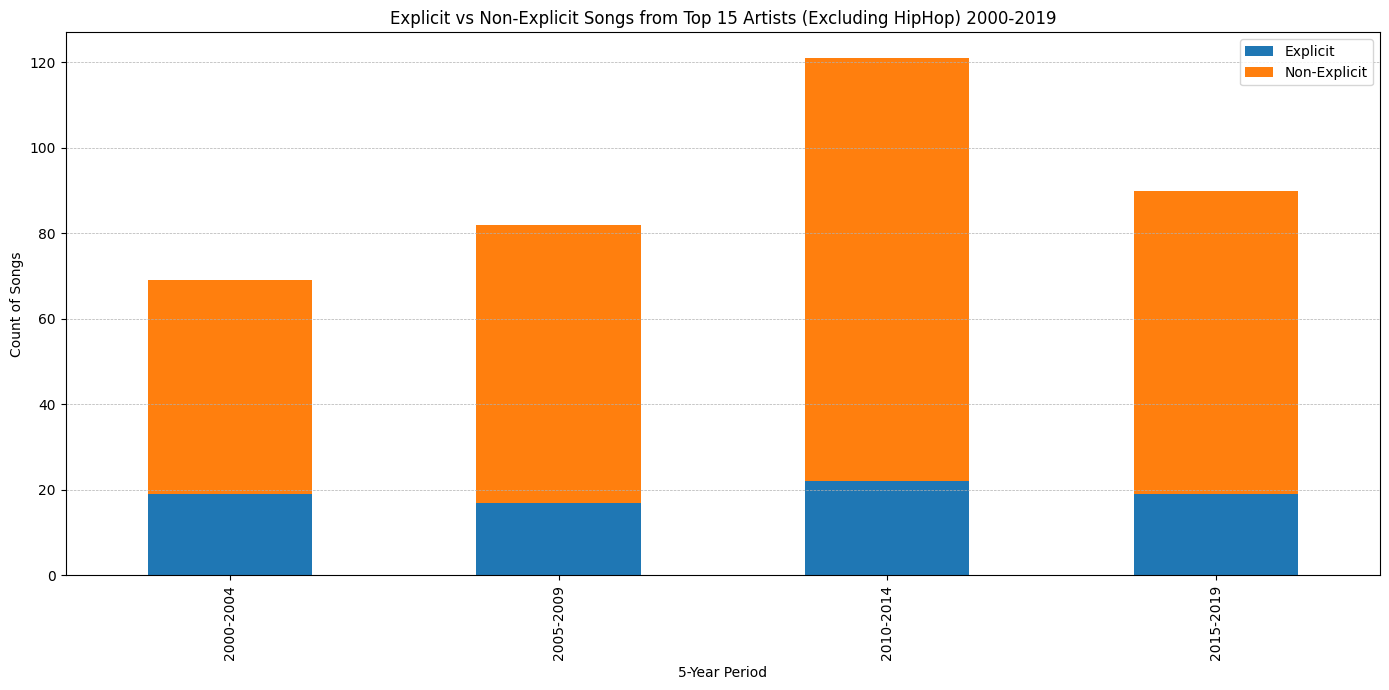

In [39]:
# list of hiphop artists
hiphop_artists = ["Eminem", "USHER", "Outkast", "JAY-Z", "Kanye West", "Akon", "Drake", "Post Malone", "Kendrick Lamar"]

# get explicit and non explicit counts for a given set of artists and time frame
def get_explicit_nonexplicit_counts_excluding_hiphop(year_filter, artist_list):
    # exclude hip-hop artists
    non_hiphop_artist_list = [artist for artist in artist_list if artist not in hiphop_artists]
    
    # get counts
    filtered_artists = year_filter[year_filter['artist'].isin(non_hiphop_artist_list)]
    explicit_count = filtered_artists['explicit'].sum()
    nonexplicit_count = len(filtered_artists) - explicit_count
    return explicit_count, nonexplicit_count

# calculate the explicit and nonexplicit counts for each time frame excluding hiphop artists
counts_non_hiphop_corrected = {
    '2000-2004': get_explicit_nonexplicit_counts_excluding_hiphop(year_filter_2000_2004, top_15_artists_2000_2004.index),
    '2005-2009': get_explicit_nonexplicit_counts_excluding_hiphop(year_filter_2005_2009, top_15_artists_2005_2009.index),
    '2010-2014': get_explicit_nonexplicit_counts_excluding_hiphop(year_filter_2010_2014, top_15_artists_2010_2014.index),
    '2015-2019': get_explicit_nonexplicit_counts_excluding_hiphop(year_filter_2015_2019, top_15_artists_2015_2019.index)
}

# convert to dataframe for viz
counts_df_corrected = pd.DataFrame(counts_non_hiphop_corrected, index=['Explicit', 'Non-Explicit']).T


counts_df_corrected.plot(kind='bar', stacked=True, figsize=(14, 7))


plt.title('Explicit vs Non-Explicit Songs from Top 15 Artists (Excluding HipHop) 2000-2019')
plt.ylabel('Count of Songs')
plt.xlabel('5-Year Period')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.legend()


plt.tight_layout()
plt.show()


In the graph above, I expected to see a clear trend of pop music becoming more explicit over the years, influenced by hip-hop. My assumption was that pop would show a bigger shift in this direction. However, the data suggests otherwise. It seems that the top pop artists, despite evolving sounds, don't fully follow the explicit content of hip-hop.<br><br>
There are of course artist out there that has been more inspired by hiphop the last couple of years, two examples could be Miley Cyrus and Justin Bieber.<br>
But just to be sure I'm not just assuming this as well, instead of just looking at the explicitness, lets compare their lyrics from some of their early album to a later one.

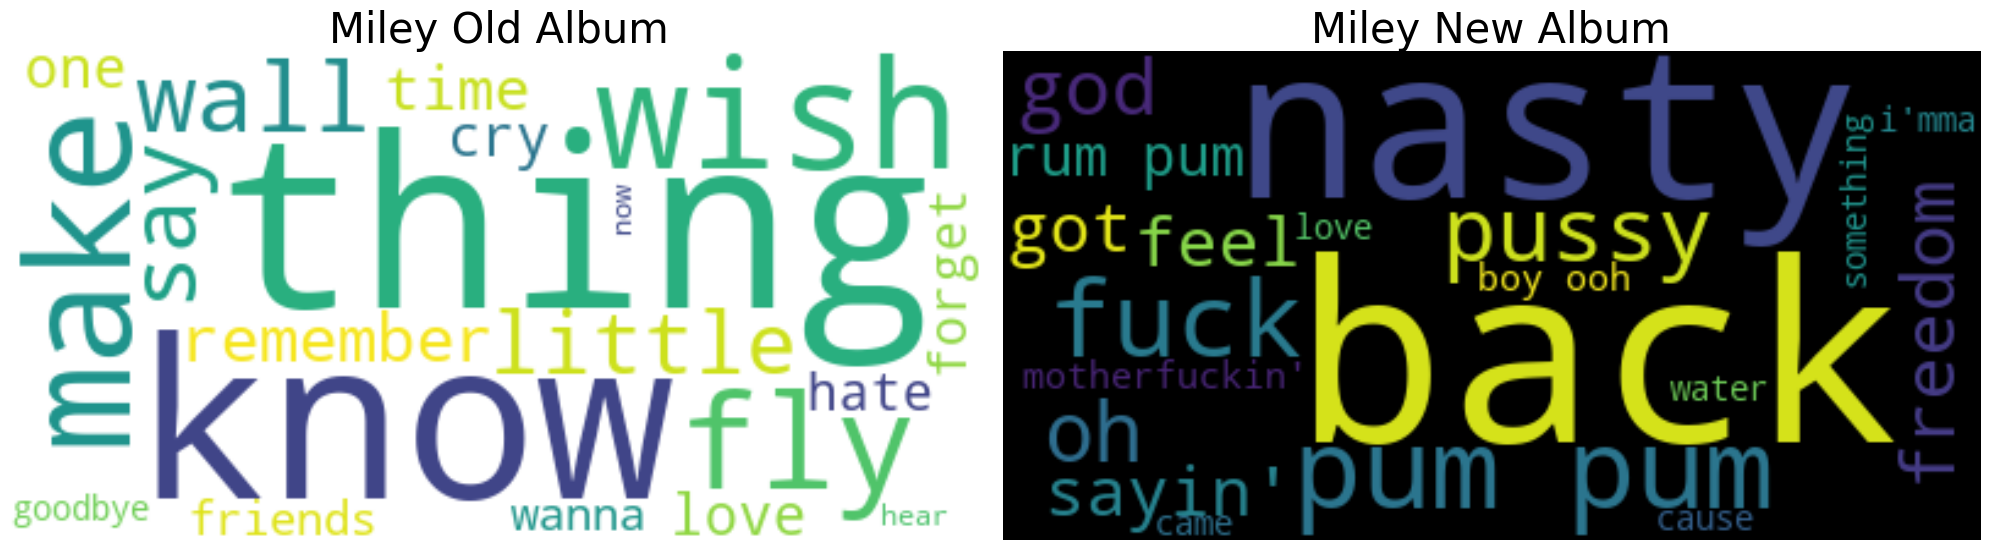

In [48]:
from wordcloud import WordCloud, STOPWORDS
from lyric_data import *

miley_breakout = miley_breakout_lyrics.lower()
miley_she_is_coming = miley_she_is_coming_lyrics.lower()

stopwords = set(STOPWORDS) # remove stopwords

# fine-tuning
stopwords.add('yeah') 

# wordcloud for miley old album
miley_cloud_old = WordCloud(
    background_color='white',
    max_words=20,
    stopwords=stopwords
)
miley_cloud_old.generate(miley_breakout)

# wordcloud for miley new album
miley_cloud_new = WordCloud(
    background_color='black',
    max_words=20,
    stopwords=stopwords
)
miley_cloud_new.generate(miley_she_is_coming)


plt.figure(figsize=(20, 10))

# plot miley old album
plt.subplot(1, 2, 1)
plt.imshow(miley_cloud_old, interpolation='bilinear')
plt.axis('off')
plt.title('Miley Old Album', fontsize=30)

# plot miley new album
plt.subplot(1, 2, 2)
plt.imshow(miley_cloud_new, interpolation='bilinear')
plt.axis('off')
plt.title('Miley New Album', fontsize=30)

plt.tight_layout()
plt.show()

To the left are lyrics from some of here top songs in one of her old album, and to the right is from one of here latest albums.<br>
It's clear to say that she changed up her lyrics quite a bit, most probably influenced by the trending mainstream hiphop scene in the 2010's.<br><br>
Let's also have a look if Justin Bieber's lyrics followed the same pattern.

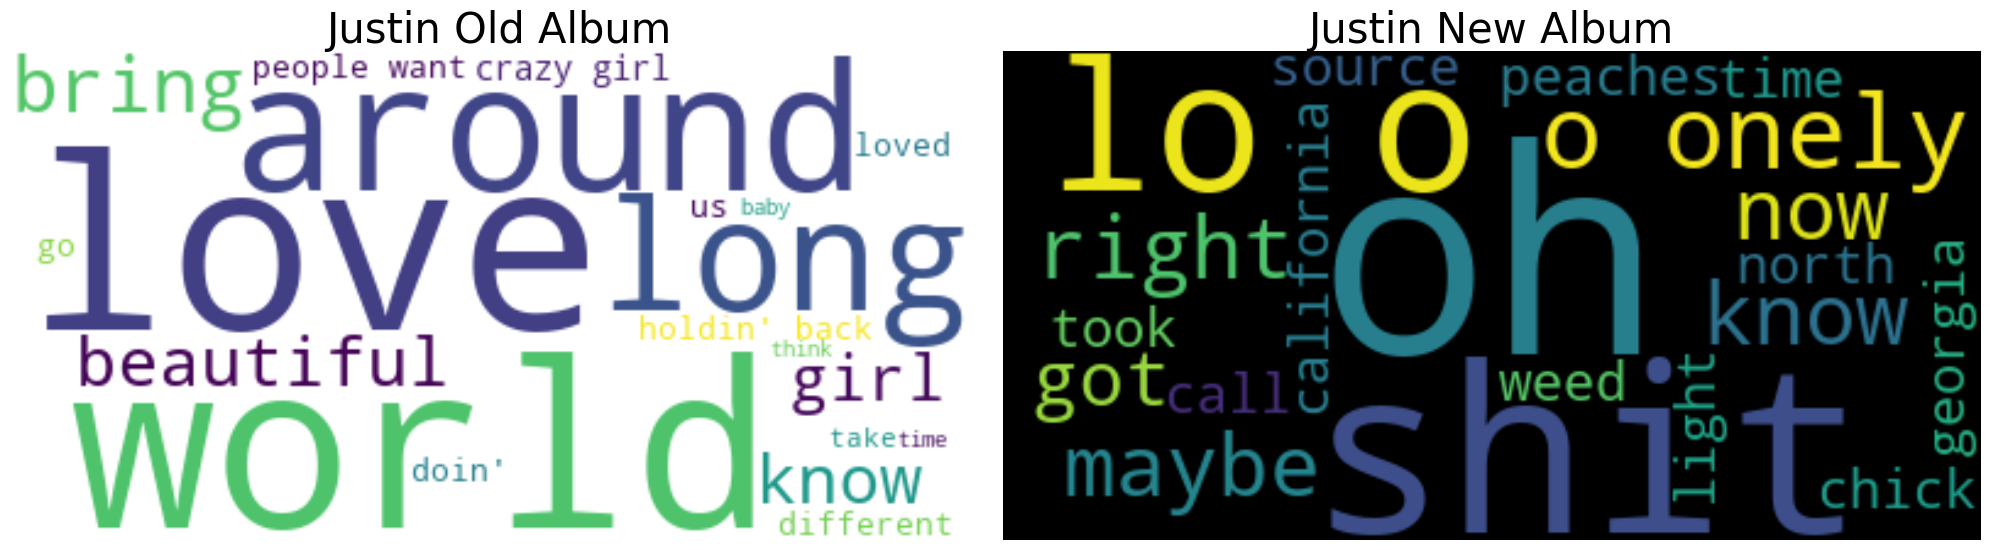

In [41]:
from wordcloud import WordCloud, STOPWORDS
from lyric_data import *

justin_believe = justin_believe_lyrics.lower()
justin_justice = justin_justice_lyrics.lower()

stopwords = set(STOPWORDS) # remove stopwords

# fine-tuning 
stopwords.add('yeah') 

# wordcloud for Justin old album
justin_cloud_old = WordCloud(
    background_color='white',
    max_words=20,
    stopwords=stopwords
)
justin_cloud_old.generate(justin_believe)

# wordcloud for Justin new album
justin_cloud_new = WordCloud(
    background_color='black',
    max_words=20,
    stopwords=stopwords
)
justin_cloud_new.generate(justin_justice)

plt.figure(figsize=(20, 10))

# plot Justin old album
plt.subplot(1, 2, 1)
plt.imshow(justin_cloud_old, interpolation='bilinear')
plt.axis('off')
plt.title('Justin Old Album', fontsize=30)

# plot Justin new album
plt.subplot(1, 2, 2)
plt.imshow(justin_cloud_new, interpolation='bilinear')
plt.axis('off')
plt.title('Justin New Album', fontsize=30)

plt.tight_layout()
plt.show()

It's quite obivous that he's also been inspired by the hip hop scene.<br><br>
While the previous bar chart suggested that pop music has not become more explicit, artists like Miley Cyrus and Justin Bieber don't seem to follow this just by looking at some of their top tracks.<br> Their transition to more explicit lyrics, as evident from the word clouds above, could be a move from them to stay relevant and resonate with the younger audience of today, which is heavily influenced by the lyrical content of mainstream hip-hop.<br>

### 4.3 The rise and fall of the Loudness War

In the evolution of music, not only have lyrics and genres shifted, but so has the loudness of the music. From the 1990s and peaking around 2010, there was a clear trend of hit songs getting louder.<br> Oh, and this does not mean just turning the volume knob up, but how songs were actually produced and mastered in studios.

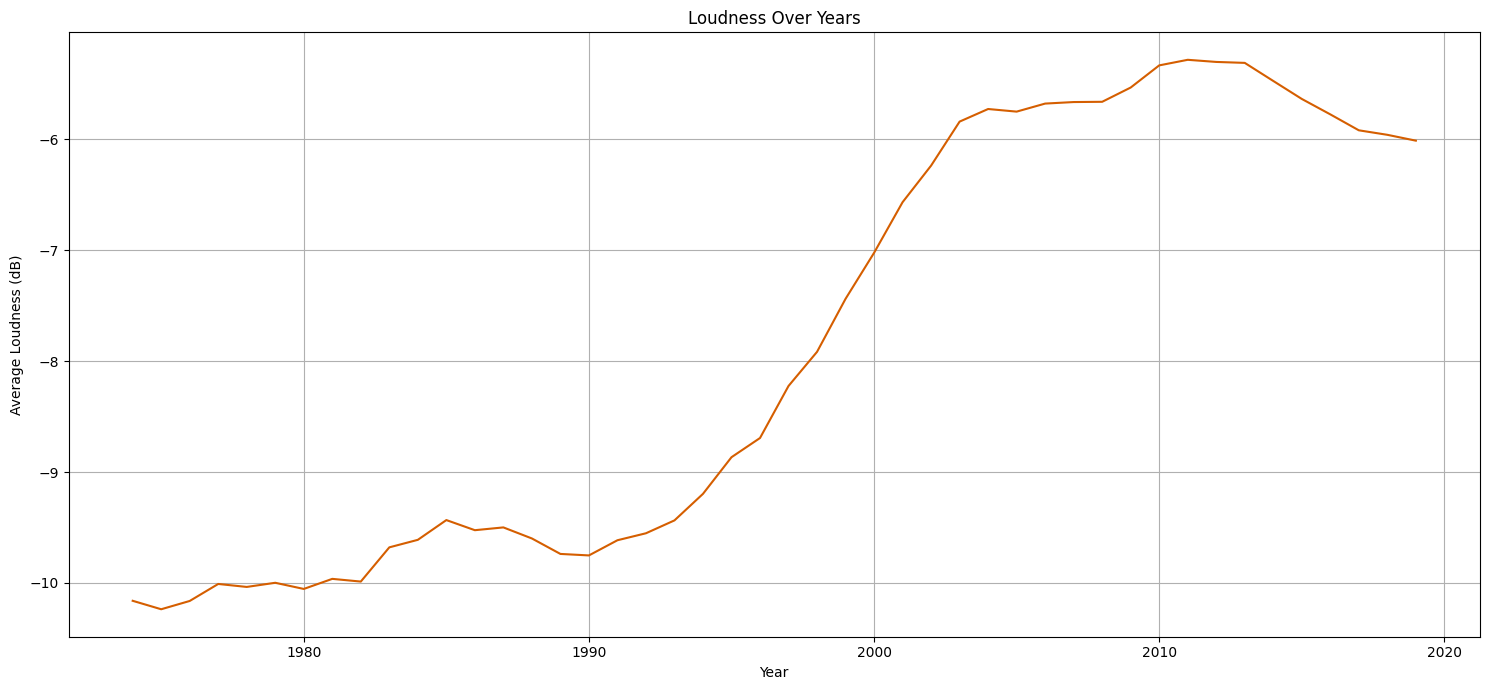

In [43]:
window_size = 5

grouped_data_loud = df.groupby('year')[['loudness']].mean()
grouped_data_loud['loudness_moving'] = grouped_data_loud['loudness'].rolling(window=window_size).mean()

plt.figure(figsize=(15, 7))

sns.lineplot(data=grouped_data_loud, x=grouped_data_loud.index, y='loudness_moving', color=line_colors[3])
plt.title('Loudness Over Years')
plt.ylabel('Average Loudness (dB)')
plt.xlabel('Year')
plt.grid(True)

plt.tight_layout()
plt.show()


The goal of this was simply to make songs stand out. A louder song would grab a listener's attention more, especially when played on the radio. But there was a negative side effect to this.<br> 
Making songs louder often crushed the dynamic range of a track, parts that were quiet became louder, and parts that were loud did not stand out as much. This change could make some details in the music less clear.

<div style="text-align: center;">
    <img src="https://mastering.com/wp-content/uploads/2018/11/loudness.png" alt="Compression" width="650"/>
</div>

*Image showing a "raw" track (top) compared to a overly compressed, loud track (bottom)* <br>
*Source: https://mastering.com/over-compression/*

So now it should be somewhat clear why songs were getting louder, but why is there a dip after 2010? Some possible reasons to this could be:<br>
- **Listener awareness**: As the side effects of the loudness war becase more clear to the public, producers have started lowering the volumes in their productions.
- **Digital platforms**: Services like Spotify and Apple music are "normalizing" track which means the tracks gets an automatic volume adjustment. This makes it unneccessary for producers to try and create their track as loud as possible.
- **Quality**: As people care more about sound quality with better headphones and speakers available, there might be a shift towards better song quality. This means not making a song too loud, but focusing on its different highs and lows instead. Bringing that wow factor when it's needed and not just turning up the whole track. Letting a track "breathe" like this makes it easier to hear all of the elements of a song.

<div style="text-align: center;">
    <img src="https://static-prod.adweek.com/wp-content/uploads/2019/12/Spotify-Playback-Settings-Enable-Audio-Normalization-Toggle.png" alt="Normalization" width="650"/>
</div>

*Audio normalization on spotify* <br>
*Source: https://www.adweek.com/performance-marketing/spotify-heres-how-to-turn-off-audio-normalization/*

To summarize this shortly, in today's online world, being the loudest song doesn't mean you stand out. Since platforms balance out the sound, the focus is back on well produced music instead of how loud it sounds.

***

# 5. What makes a modern song a hit?

I want to know if it is possible to see what makes a modern track popular, by only looking at the features from the Spotify API.<br>
To achieve this, first of all I am creating a new dataset with all the albums from the 2019 hit list to have a wider range of popularity in the tracks.<br>
This dataset contains around 800 songs which will be enough for this part of the analysis.

In [19]:
album_df = pd.read_csv('../data/modern_albums_cleaned.csv')

### 5.1 Popularity distrubution
Lets start of by having a look at the popularity distrubution

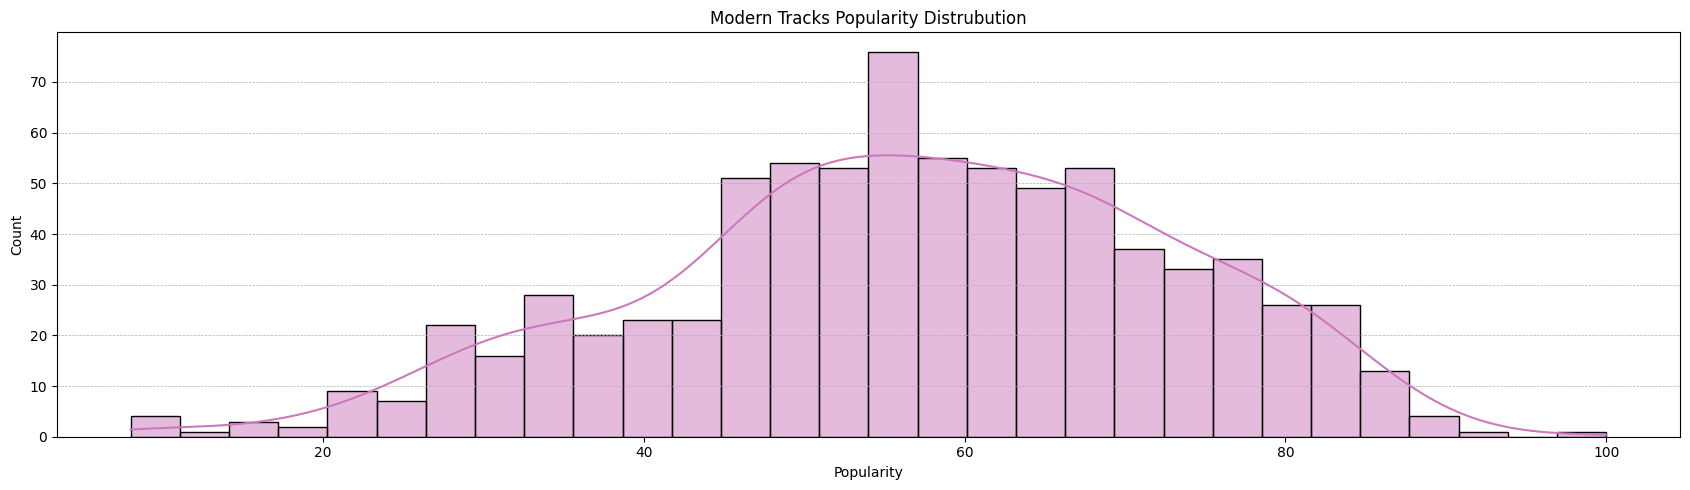

In [20]:
# get color from the colorblind palette
pink_color = sns.color_palette("colorblind", 8)[4]

plt.figure(figsize=(17, 5))
sns.histplot(album_df['popularity'], bins=30, color=pink_color, kde=True)
plt.title('Modern Tracks Popularity Distrubution')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

The histogram above shows two things: <br>
- Most of the scores range around and between 50 and 70 in popularity.
- The distrubution is slightly skewed to the left, which basically means there are some high scores in this new dataset, just not as many as before.<br>

This is what I was looking for when I created this dataset, to have more spread on popularity but still keep some higher scores in there.

### 5.2 Danceability and Energy VS Popularity
Next up, I want to see if there is any relationship between danceability/energy and popularity.

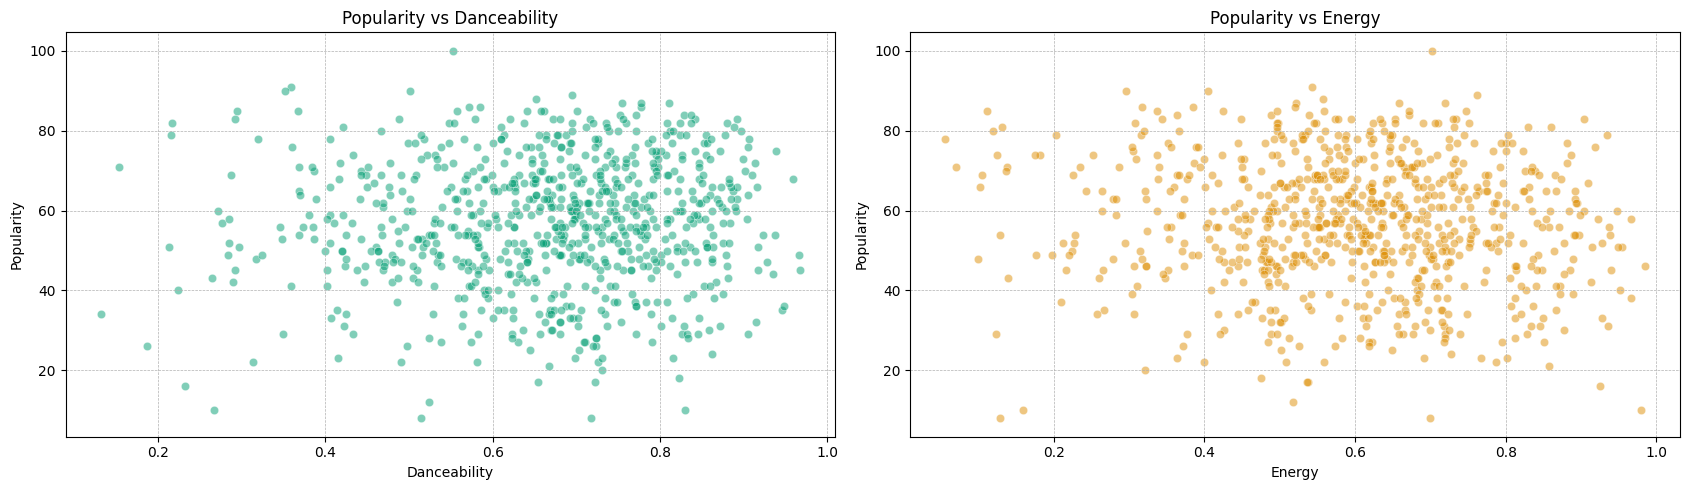

In [21]:
plt.figure(figsize=(17, 5))

# get color from the colorblind palette
green_color = sns.color_palette("colorblind", 8)[2]
yellow_color = sns.color_palette("colorblind", 8)[1]

# popularity vs danceability scatter
plt.subplot(1, 2, 1) 
sns.scatterplot(data=album_df, x='danceability', y='popularity', alpha=0.5, color=green_color)
plt.title('Popularity vs Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# popularity vs energy scatter
plt.subplot(1, 2, 2)
sns.scatterplot(data=album_df, x='energy', y='popularity', alpha=0.5, color=yellow_color)
plt.title('Popularity vs Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

- **Popularity vs Danceability**: There is quite a broad spread here that indicates that songs with both high and low danceability can score high in popularity. However, many of the popular songs seem to cluster a little bit more to the higher danceability scores.
- **Popularity vs Energy**: A bit more spread out here, indicating a little bit towards higher energy = more popularity, but it's hard to tell.<br>

The biggest finding in these two scatter plots is that the Spotify algorithm score danceability and energy very similar, which make sense when you think about it.

### 5.3 Loudness VS Popularity
Lets also take a look at the relationship between loudness and popularity.

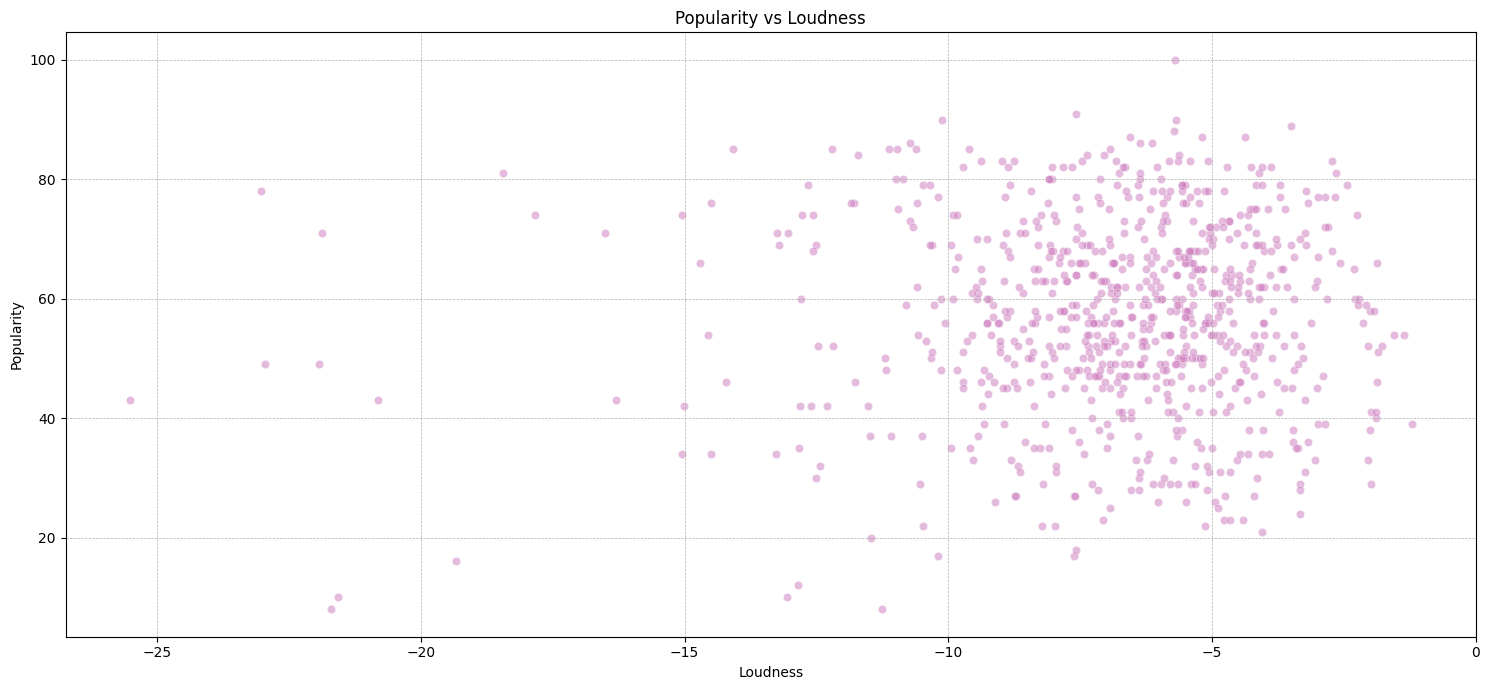

In [22]:
plt.figure(figsize=(15, 7))
pink_color = sns.color_palette("colorblind", 8)[4]

# popularity vs loudness scatter
sns.scatterplot(data=album_df, x='loudness', y='popularity', alpha=0.5, color=pink_color)
plt.title('Popularity vs Loudness')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

- **Popularity vs Loudness**: This scatter plot surely indicates that there is a cluster around higher loudness in songs, but there is not a clear trend showign that louder songs are more popular.

### 5.4 Keys against Popularity

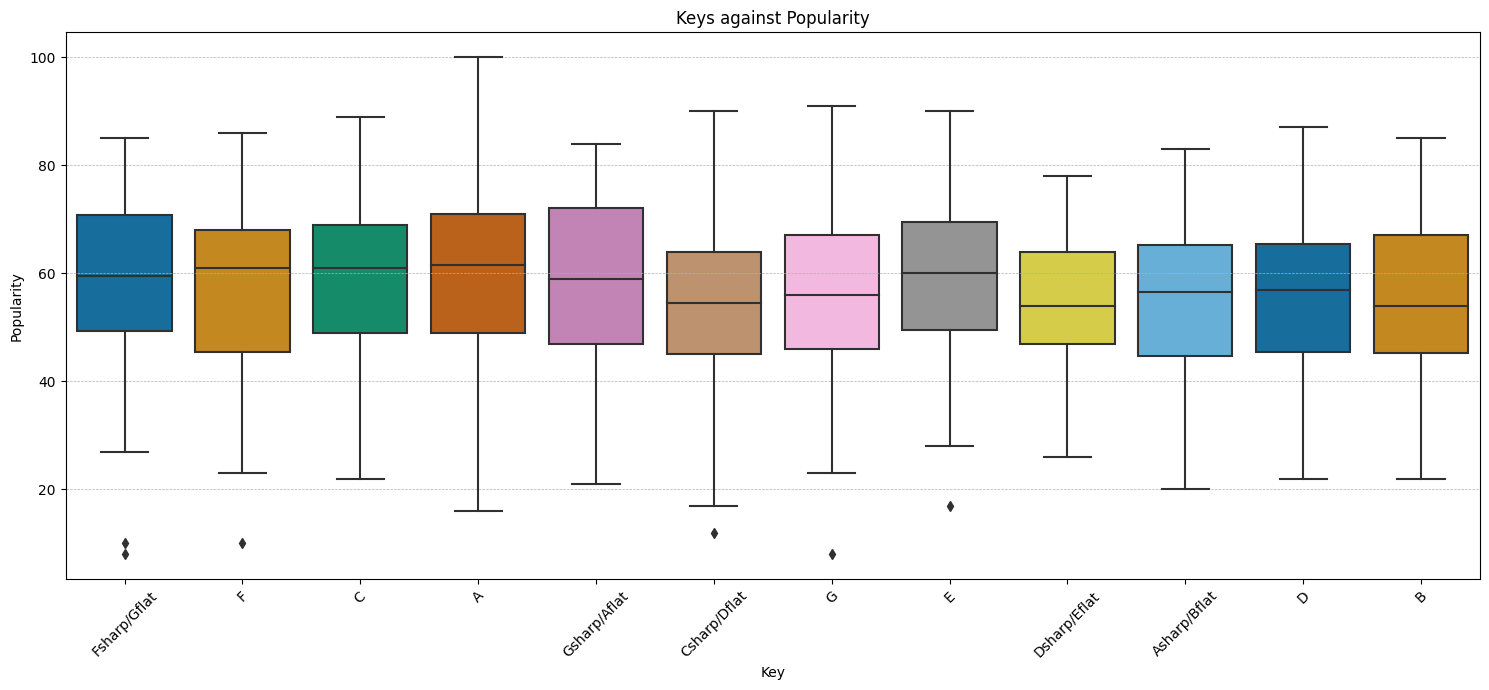

In [23]:
plt.figure(figsize=(15, 7))

# keys against popularity whisker plot
sns.boxplot(data=album_df, x='key', y='popularity', palette='colorblind')
plt.title('Keys against Popularity')
plt.xlabel('Key')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

- **Keys against popularity**: The median popularity is pretty consistent across all the keys, which would suggest that there is not specific key that could guarantee a higher popularity score. There is how ever a spread across the box sizes and the whiskers and some do stand out more, but there is nothing of significance.

### 5.5 Corr.Matrix

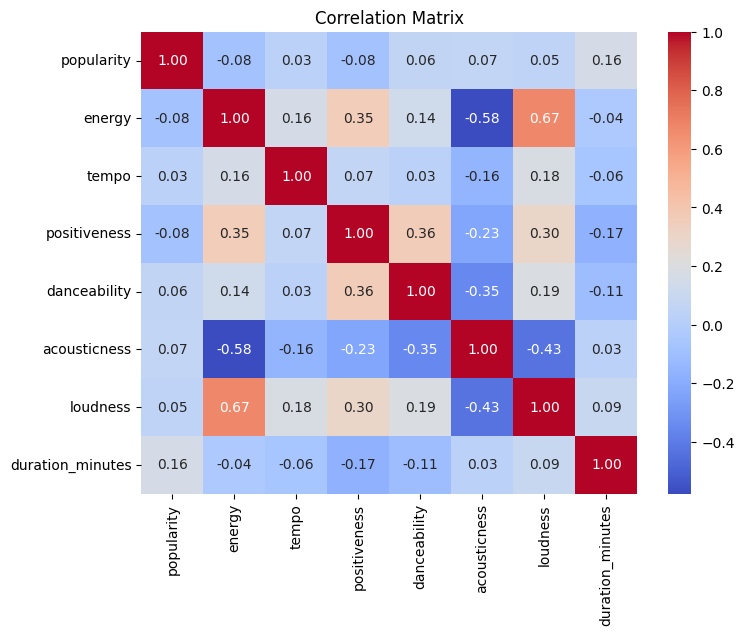

In [53]:
# calculate correlations for valid columns only, drop the rest
numeric_columns = album_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['year'])
correlation_matrix = album_df[numeric_columns].corr()


# display corr matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # note. fmt rounds up the numbers in the matrix
plt.title("Correlation Matrix")
plt.show()

- **Correlation matrix**: From the correlation matrix, it's pretty evident that most attributes have a low correlation with the 'popularity' attribute from the Spotify API.

### 5.6 Conclusion

Analysing songs to find out what makes them hits is not an easy task. From the dataset, I have noticed that popular songs tend to be more danceable and energetic. But there is a lot more behind the success of a song. Record labels, marketing, how famous the artist is, melodies/hooks, social media presence and even the time the song is released can all play a part.

This dataset gave me a look into the music scene of 2019, but it is 2023 now. Music tastes might have changed a bit since then but not by much. Even with all this data, there is no secret formula to making a hit song.

I was hoping to find some kind of ingredient in what could make a song successful, as I do write and produce songs myself. So my key takeaway from this is that there's no fixed formula for a hit song. Success can come from various factors, many of which are beyond the song's attributes.

***

# 6. Outro

I began this analysis with a broad exploration, then narrowed down to delve into historical music trends, focusing mostly on the 2000s. After that, I wanted to understand what makes a modern track a hit, using Spotify's API features.<br>
There have been some interesting patterns and trends throughout this analysis. However, given the broad scope of this project (at least what it turned out to be), I did not deep dive into any single topic. Instead, I spread my attention across areas I personally was most curious about.<br>

I do wish it was simpler to access genre data and lyrics for the datasets in this study. It's possible Spotify holds back on providing such data to prevent others from creating a stronger song recommendation tool.<br>
Despite my findings, I have hit a lot of obstacles. The most obvoius one was trying to figuare out the secret ingredient of a songs popularity just by looking at spotifys features which turned out to be a very hard, perhaps naive, task.<br>

But maybe there is a silver lining to this. In an age rapidly omving towards AI and automation, it's comforting to see that music, more specific modern hit music, still demands the human touch. It's a proof that it can't be reduced to algorithms. At least for now...